In [44]:
# Importing the liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Fetching the data
data_path = r'C:\Work\YouTube\Diwali_Sales_Data\data_cleaned.csv'
data = pd.read_csv(data_path, encoding='unicode_escape')
data.head(2)

,Unnamed: 0,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Marriage_Status
0,18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
1,19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11234 entries, 0 to 11233
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11234 non-null  int64  
 1   User_ID           11234 non-null  float64
 2   Cust_name         11234 non-null  object 
 3   Product_ID        11234 non-null  object 
 4   Gender            11234 non-null  object 
 5   Age Group         11234 non-null  object 
 6   Age               11234 non-null  float64
 7   Marital_Status    11234 non-null  float64
 8   State             11234 non-null  object 
 9   Zone              11234 non-null  object 
 10  Occupation        11234 non-null  object 
 11  Product_Category  11234 non-null  object 
 12  Orders            11234 non-null  float64
 13  Amount            11234 non-null  float64
 14  Marriage_Status   11234 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.3+ MB


In [47]:
# Creating the copy of dataset
df = data.copy()

In [48]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [49]:
# Final Data
df.to_csv(r"C:\Work\YouTube\Diwali_Sales_Data\final_data.csv", index = False)

## Explotary Data Analytics

### Statistical Analysis

In [50]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000
mean,1.007453e+06,35.433772,0.419708,2.489496,9452.764638
std,2.109026e+05,12.759432,0.493533,1.114845,5213.784648
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.500000
75%,1.004429e+06,43.000000,1.000000,3.000000,12681.500000
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000


### Data Visualization

### Analysis Parameter
- Gender
- Marriage_Status
- Age_Group
- Product_category
- State
- Product_id
- Occupation

### Gender Wise Analysis

In [51]:
# Plot Data
data_gender_count = df.groupby(['Gender'], as_index = False)['Orders'].count()
print('Gender wise order count: \n', data_gender_count)
data_gender_amount = df.groupby(['Gender'], as_index = False)['Amount'].sum()
print('Gender wise purchase power: \n', data_gender_amount)

Gender wise order count: 
   Gender  Orders
0      F    7835
1      M    3399
Gender wise purchase power: 
   Gender       Amount
0      F  74422989.94
1      M  31769368.00


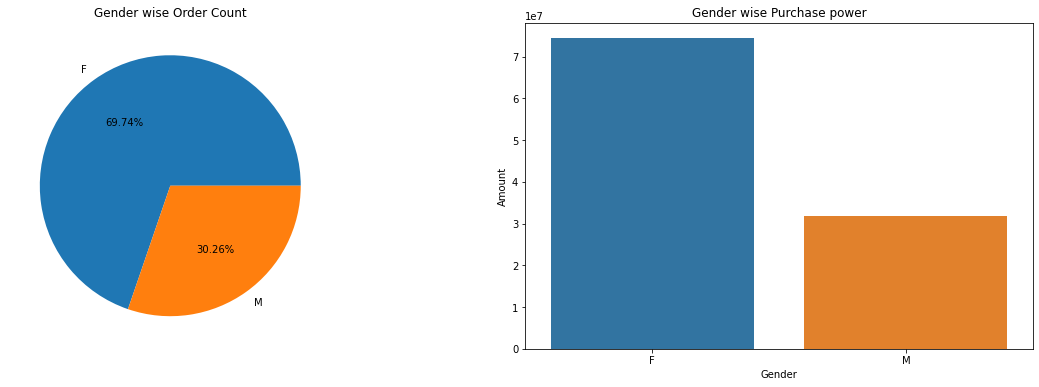

In [52]:
# Plotting the Gender data
fig, ax = plt.subplots(1,2, figsize = (20, 6))
ax[0].pie(x = data_gender_count['Orders'],
         labels = data_gender_count['Gender'], autopct = '%1.2f%%')
ax[0].set_title('Gender wise Order Count')

#Bar plot
sns.barplot(x = 'Gender', y = 'Amount', data = data_gender_amount, ax = ax[1])
ax[1].set_title('Gender wise Purchase power')

plt.show()

### Conclusion
Females places more orders and their purchase power is also higher.

### Marriage status wise analysis

In [53]:
# Plot data
data_marraige_status_amount = df.groupby(['Marriage_Status'], as_index = False)['Amount'].sum()
data_marraige_status_amount

,Marriage_Status,Amount
0,Married,44003938.00
1,Unmarried,62188419.94


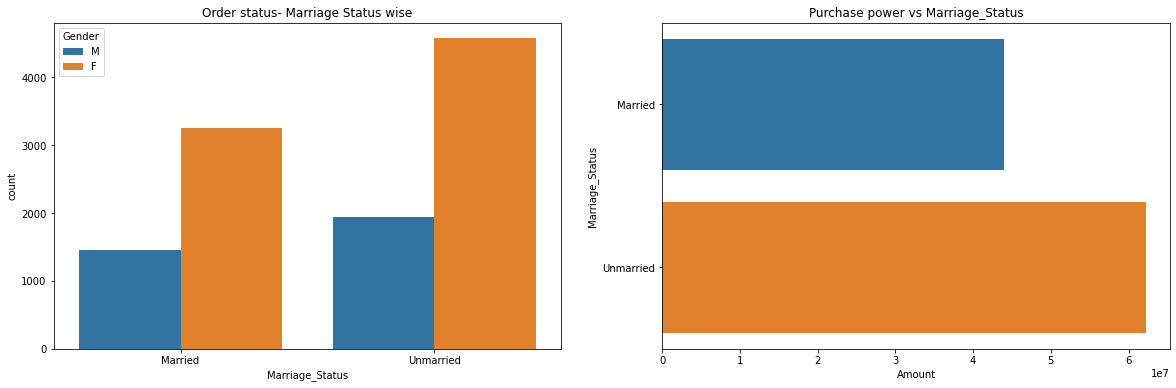

In [54]:
# Ploting the Marriage_Status data
fig, ax = plt.subplots(1,2, figsize = (20,6))
sns.countplot(x = 'Marriage_Status', hue = 'Gender', data = df, ax= ax[0])
ax[0].set_title('Order status- Marriage Status wise')
sns.barplot(x = 'Amount', y = 'Marriage_Status', data = data_marraige_status_amount, orient = 'h', ax = ax[1])
ax[1].set_title('Purchase power vs Marriage_Status')
plt.show()

### Conclusion
Unmarried female places more order, then married female, and then unmarried male.

### Age group wise analysis

In [16]:
# Plotting Age Group 
data_age_group_amount = df.groupby(['Age Group'], as_index = False)['Amount'].sum()
data_age_group_amount

,Age Group,Amount
0,0-17,2696529.00
1,18-25,17032196.00
2,26-35,42603794.95
3,36-45,22234332.99
4,46-50,9245595.00
5,51-55,8278320.00
6,55+,4101590.00


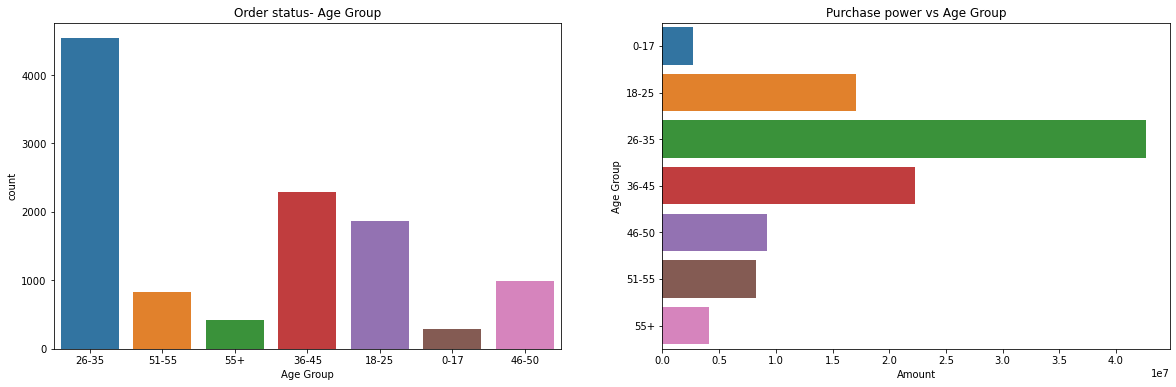

In [18]:
# Plot the data
fig, ax = plt.subplots(1,2, figsize = (20,6))
sns.countplot(x = 'Age Group', data = df, ax= ax[0])
ax[0].set_title('Order status- Age Group')
sns.barplot(x = 'Amount', y = 'Age Group', data = data_age_group_amount, orient = 'h', ax = ax[1])
ax[1].set_title('Purchase power vs Age Group')
plt.show()

### Conclusion
26-35 Age Group people orders and purchased mostly than others.

### Product_Category Wise Analysis

In [41]:
# Plotting Age Group 
data_product_category_amount = df.groupby(['Product_Category'], 
                                          as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head()
data_product_category_amount

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16484472.00
7,Footwear & Shoes,16009057.45
5,Electronics & Gadgets,15607657.00
8,Furniture,5481325.99


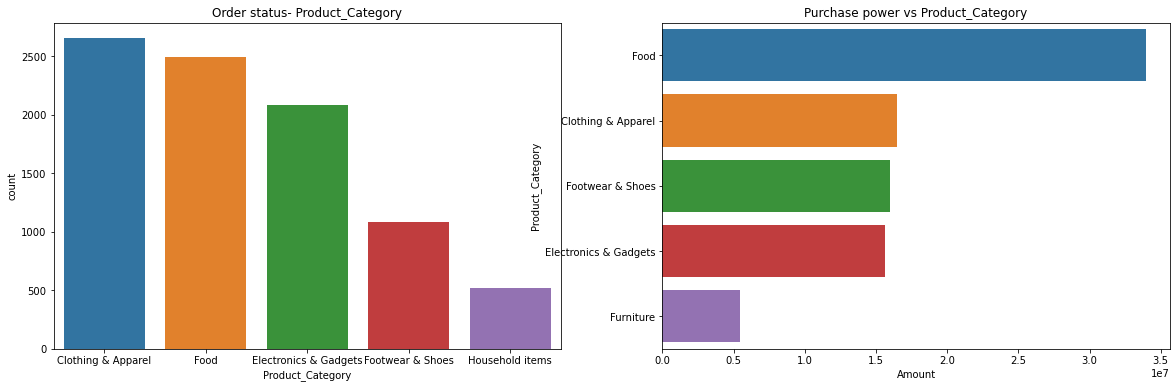

In [42]:
# Ploting the top 5 performing category
fig, ax = plt.subplots(1,2, figsize = (20,6))
sns.countplot(x = 'Product_Category', data = df, 
              order = df['Product_Category'].value_counts().nlargest(5).index, ax= ax[0])
ax[0].set_title('Order status- Product_Category')

sns.barplot(x = 'Amount', y = 'Product_Category', data = data_product_category_amount, orient = 'h', ax = ax[1])
ax[1].set_title('Purchase power vs Product_Category')
plt.show()

### Conclusion
Highest selling Product is Food,then Clothing & Apparel and then Footwear & Shoes.

### State Wise Analysis

In [33]:
# Plotting State 
data_state_amount = df.groupby(['State'], 
                                          as_index = False)['Amount'].sum().sort_values(by = ['Amount'], ascending = False)[:5]
data_state_amount

,State,Amount
14,Uttar Pradesh,19360148.00
10,Maharashtra,14400762.00
7,Karnataka,13705829.00
2,Delhi,11554343.95
9,Madhya Pradesh,8100944.00


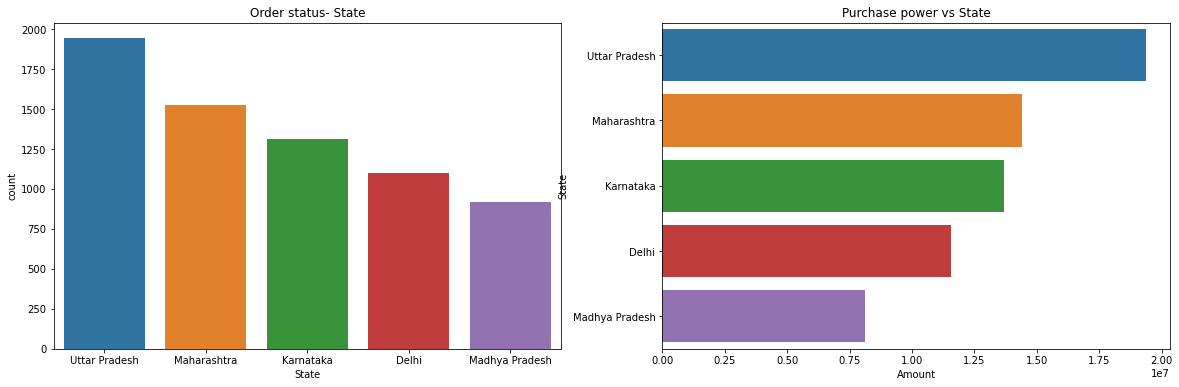

In [34]:
# Ploting the top 5 performing state
fig, ax = plt.subplots(1,2, figsize = (20,6))
sns.countplot(x = 'State', data = df, 
              order = df['State'].value_counts().nlargest(5).index, ax= ax[0])
ax[0].set_title('Order status- State')

sns.barplot(x = 'Amount', y = 'State', data = data_state_amount, orient = 'h', ax = ax[1])
ax[1].set_title('Purchase power vs State')
plt.show()

#### Conclusion
Uttar Pradesh is the highest performing State, then Maharashtra, then Karnataka.

### Product_id Wise Analysis

In [35]:
# Plotting Product_id
data_product_id_amount = df.groupby(['Product_ID'], 
                                          as_index = False)['Amount'].sum().sort_values(by = ['Amount'], ascending = False)[:5]
data_product_id_amount

,Product_ID,Amount
1678,P00265242,561461.0
1146,P00184942,401816.0
644,P00110942,400899.0
396,P00059442,359230.0
654,P00112142,341020.0


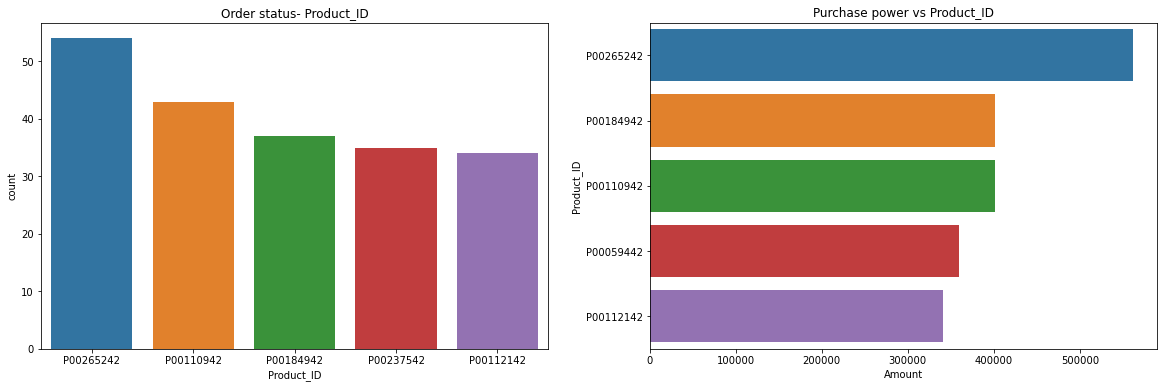

In [36]:
# Ploting the top 5 performing product_id
fig, ax = plt.subplots(1,2, figsize = (20,6))
sns.countplot(x = 'Product_ID', data = df, 
              order = df['Product_ID'].value_counts().nlargest(5).index, ax= ax[0])
ax[0].set_title('Order status- Product_ID')

sns.barplot(x = 'Amount', y = 'Product_ID', data = data_product_id_amount, orient = 'h', ax = ax[1])
ax[1].set_title('Purchase power vs Product_ID')
plt.show()

### Occupation Wise Analysis

In [37]:
# Plotting Occupation
data_occupation_amount = df.groupby(['Occupation'], 
                                          as_index = False)['Amount'].sum().sort_values(by = ['Amount'], ascending = False)[:5]
data_occupation_amount

,Occupation,Amount
10,IT Sector,14902488.00
8,Healthcare,12989061.49
2,Aviation,12596751.00
3,Banking,10767299.45
7,Govt,8425182.00


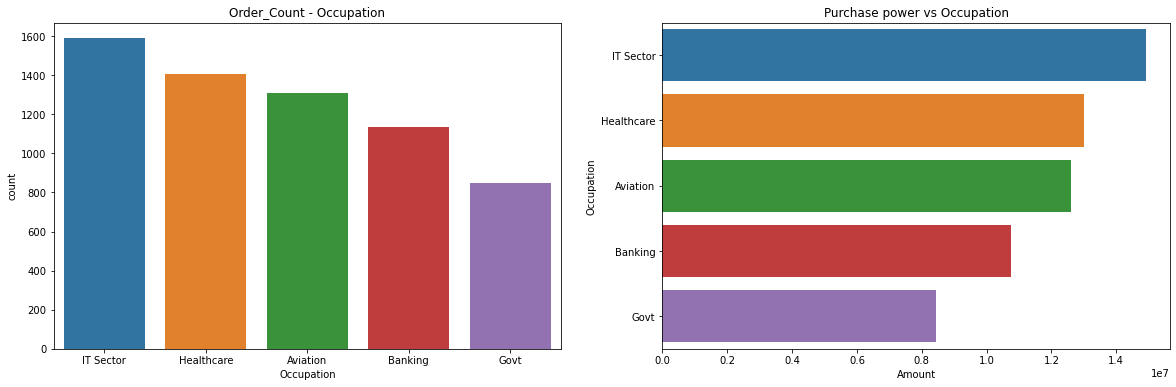

In [38]:
# Ploting the top 5 performing occupation
fig, ax = plt.subplots(1,2, figsize = (20,6))
sns.countplot(x = 'Occupation', data = df, 
              order = df['Occupation'].value_counts().nlargest(5).index, ax= ax[0])
ax[0].set_title('Order_Count - Occupation')

sns.barplot(x = 'Amount', y = 'Occupation', data = data_occupation_amount, orient = 'h', ax = ax[1])
ax[1].set_title('Purchase power vs Occupation')
plt.show()

#### Conclusion
IT Sector is the highest performing Occupation, then Healthcare, then Aviation.

### Conclusion
1. Females places more orders and their purchase power is also higher.
2. Unmarried female places more order, then married female, and then unmarried male.
3. 26-35 Age Group people orders and purchased mostly than others.
4. Highest selling Product is Food, Clothing & Apparel, Footwear & Shoes.
5. Uttar Pradesh is the highest performing State, then Maharashtra,then Karnataka.
6. IT Sector is the highest performing Occupation, then Healthcare, then Aviation.